### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [628]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [631]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

2. Investigate the dataset for missing or problematic data.

In [633]:
missing_counts = data.isnull().sum()

3. Decide what to do about your missing data -- drop, replace, other...

In [636]:
#replace blanks with mode - for nominal values replace with mode to preserve distribution pattern
mode_bar = data['Bar'][data['Bar'] != ''].mode().iloc[0]
mode_coffeehouse = data['CoffeeHouse'][data['CoffeeHouse'] != ''].mode().iloc[0]

mode_carryaway = data['CarryAway'][data['CarryAway'] != ''].mode().iloc[0] 
mode_rest_lessthan20 = data['RestaurantLessThan20'][data['RestaurantLessThan20'] != ''].mode().iloc[0]

mode_rest_20To50 = data['Restaurant20To50'][data['Restaurant20To50'] != ''].mode().iloc[0]

data['Bar'] = data['Bar'].fillna(mode_bar)
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(mode_coffeehouse)
data['CarryAway'] = data['CarryAway'].fillna(mode_carryaway)
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(mode_rest_lessthan20)
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(mode_rest_20To50)

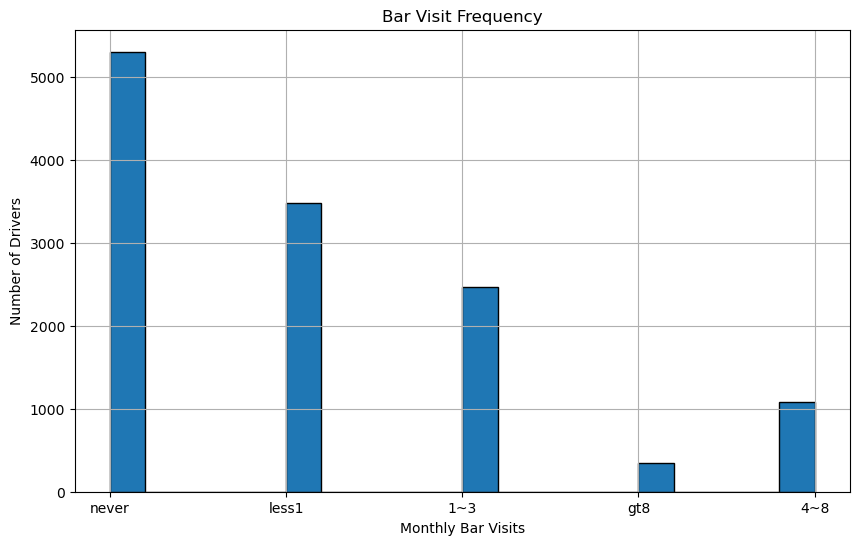

In [638]:
plt.figure(figsize=(10,6))
data['Bar'].hist(bins=20,edgecolor='black')
plt.xlabel('Monthly Bar Visits')
plt.ylabel('Number of Drivers')
plt.title('Bar Visit Frequency')
plt.show();

4. What proportion of the total observations chose to accept the coupon?



In [640]:
ratio_acceptance = data['Y'].mean()

5. Use a bar plot to visualize the `coupon` column.

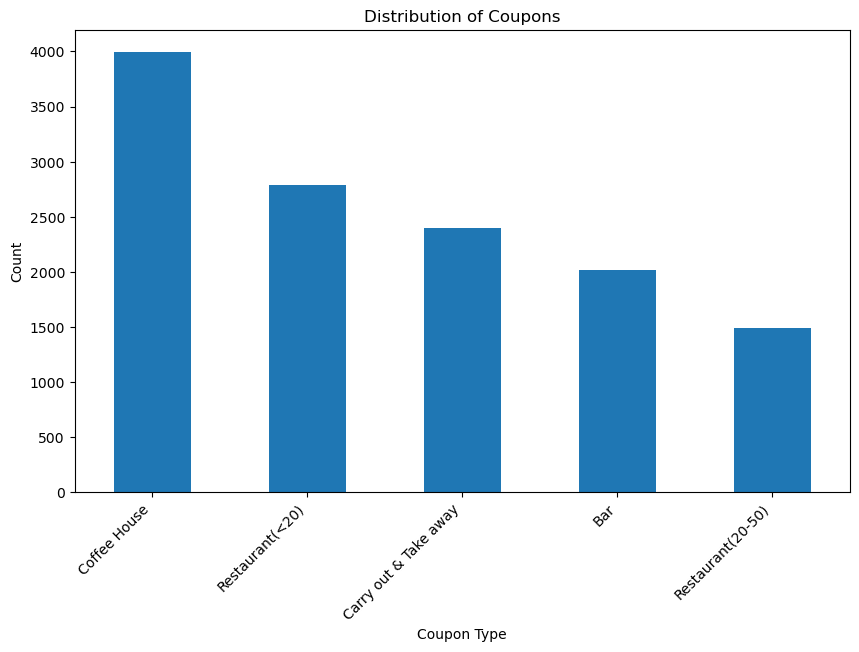

In [643]:
coupon_counts = data['coupon'].value_counts()

plt.figure(figsize=(10,6))
coupon_counts.plot(kind='bar')

plt.title('Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show();


6. Use a histogram to visualize the temperature column.

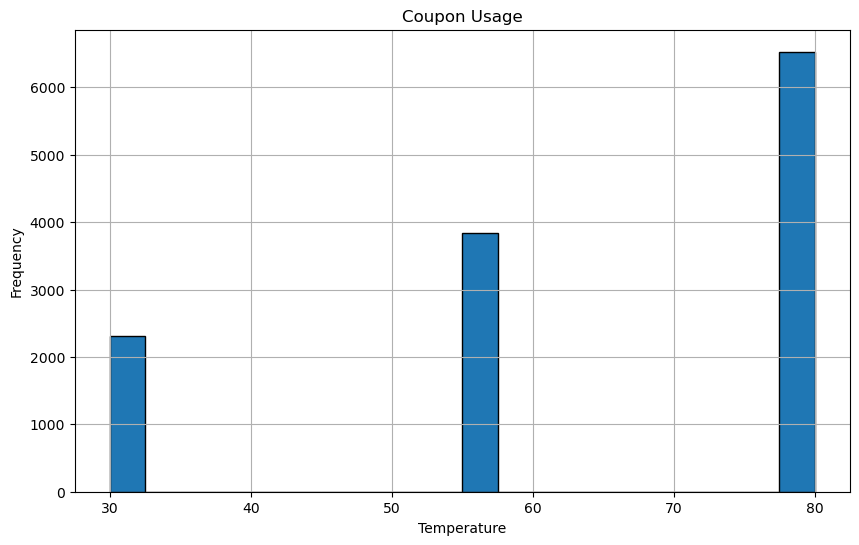

In [646]:
plt.figure(figsize=(10,6))
data['temperature'].hist(bins=20,edgecolor='black')
plt.title('Coupon Usage')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show();

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [649]:
bar_data = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [652]:
#acceptance rate is simply mean since summing values would only sum up 1 .
ratio_bar_acceptance = bar_data['Y'].mean()
print(ratio_bar_acceptance)


0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [655]:

three_or_less = ['never','less1','1~3']

num_threeorless = bar_data[bar_data['Bar'].isin(three_or_less)]
num_morethanthree = bar_data[~bar_data['Bar'].isin(three_or_less)]


ratio_three_or_less = num_threeorless['Y'].mean()
ratio_more_than_three = num_morethanthree['Y'].mean()

print(ratio_three_or_less,ratio_more_than_three)


0.37073707370737075 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [657]:
at_or_under_25 = ['21','below21']
once_or_more = ['1~3','gt8','4~8']

num_drivers2 = bar_data[~bar_data['age'].isin(at_or_under_25) & bar_data['Bar'].isin(once_or_more)]

ratio_drivers2 = num_drivers2['Y'].mean() 

print(ratio_drivers2)


0.6952380952380952


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [660]:
occupation = ['Farming Fishing & Forestry']
passenger = ['Kid(s)']


num_drivers3 = bar_data[~bar_data['occupation'].isin(occupation) & ~bar_data['passanger'].isin(passenger) 
 & (bar_data['Bar'].isin(once_or_more))]


ratio_drivers3 = num_drivers3['Y'].mean()

print(ratio_drivers3)


0.7132486388384754


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [662]:
rest_morethan4 = ['4~8']
under_the_age30 = ['21','26','below21']
widowed = ['Widowed']
less_than_50k = ['$37500 - $49999','$12500 - $24999','$250000 - $37499','Less than $12500']

num_drivers4 = bar_data[bar_data['Bar'].isin(once_or_more) &
~bar_data['passanger'].isin(passenger)
& ~bar_data['maritalStatus'].isin(widowed)]

num_drivers5 = bar_data[bar_data['Bar'].isin(once_or_more)
& bar_data['age'].isin(under_the_age30)]

num_drivers6 = bar_data[bar_data['RestaurantLessThan20'].isin(rest_morethan4)
& bar_data['income'].isin(less_than_50k)]


acceptance_rates =  [num_drivers4['Y'].mean(),num_drivers5['Y'].mean(),num_drivers6['Y'].mean()]

print(acceptance_rates)


[0.7132486388384754, 0.7217391304347827, 0.387434554973822]


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
'''Usage of bar coupon strongly correlates with 
bar going habit  of driver and current passenger 
in the ride. Age is  surprisingly not a strong indicator as seen by #5 .
Economic status may affect usability of bar coupon  but there is not enough evidence 
to draw conclusion. Low income background does yield lower acceptance 
rate but need to calculate acceptance rate of high income background 
to confirm that income is definitely a factor. Same is true of marital status 
More calculations can be run with various marital status to determine if the
acceptance rate is significant between the groups. 

I hypothesize that probability of using bar coupon by driver is highly dependent
of driver's previous frequency of going to a bar and their current
level of responsibility in the ride - absence of kid would mean low responsibility
and therefore driver is more likely to use bar coupon'''
    


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

0.7071069633883704


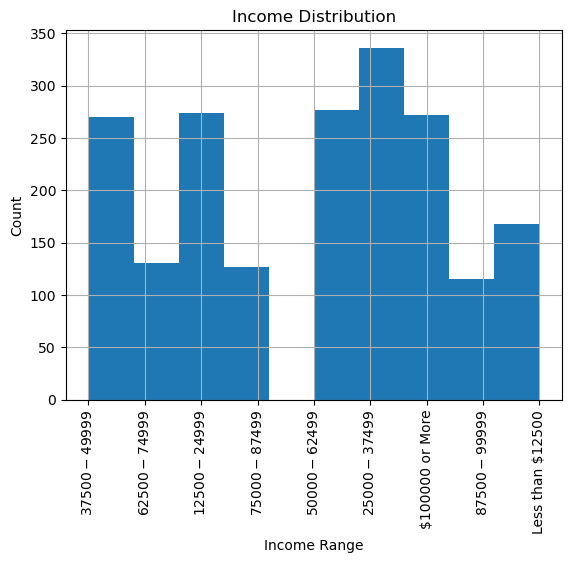

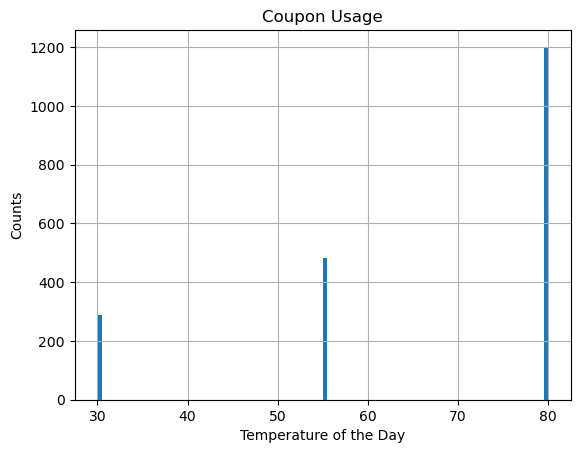

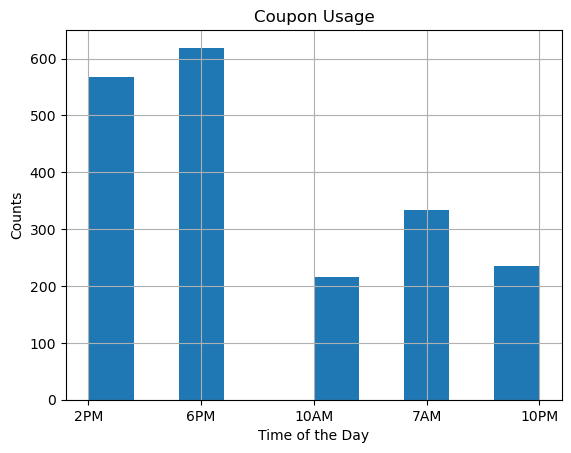

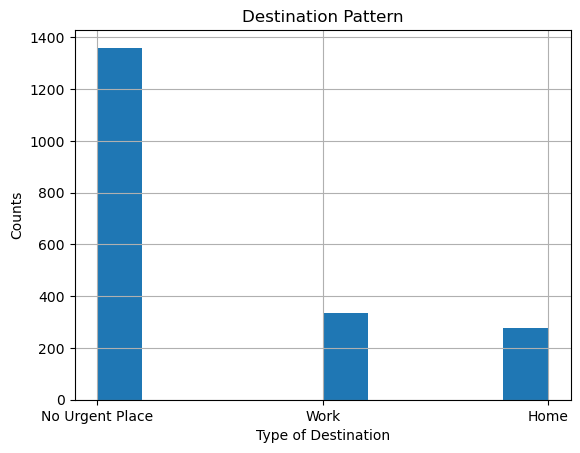

In [664]:
#Evaluate usage pattern for cheap i.e restaurant < 20 subset 

cheap_rest_subset = data[data['coupon'] == 'Restaurant(<20)']

#determine acceptance rate. High acceptance rate means this subset of population 
#could be valuable in increasing client base. 

print(cheap_rest_subset['Y'].mean())


#subset of those who accepted coupon - evaluate several factors
cheap_rest_subset_accepted = cheap_rest_subset[cheap_rest_subset['Y'] == 1]

#Income level does not indicate a clear pattern 
#meaning there are factors other than affordability
#that  matters for a driver to avail coupon at a cheap
#restaurant
cheap_rest_subset_accepted['income'].hist(bins=10)
plt.xticks(rotation=90)
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.show();

cheap_rest_subset_accepted['temperature'].hist(bins=100)
plt.xlabel("Temperature of the Day")
plt.ylabel("Counts")
plt.title('Coupon Usage')
plt.show();


cheap_rest_subset_accepted['time'].hist(bins=10)
plt.xlabel('Time of the Day')
plt.ylabel('Counts')
plt.title('Coupon Usage')

plt.show();


cheap_rest_subset_accepted['destination'].hist(bins=10)
plt.xlabel('Type of Destination')
plt.ylabel('Counts')
plt.title('Destination Pattern')
plt.show();



In [666]:

#Based on diagrams above the hypothesis is : driver
#is likely to stop at a cheap restaurant if it is close to
#breakfast, dinner, lunch time given it is pleasant 
#weather > 55F and the driver is driving to a non urgent place

#Standard meal times
time_of_day = ['2PM','6PM','7AM']

num_drivers7 = cheap_rest_subset[

(cheap_rest_subset['destination'] == 'No Urgent Place')
& (cheap_rest_subset['time'].isin(time_of_day))
& (cheap_rest_subset['temperature'] > 55)]


#Negated above conditions. Lower acceptance rate shows 
#that driver is less likely to avail coupon if weather
#is not pleasant < 55F and it is not standard meal time and when 
#destination is urgent. 
num_drivers8 = cheap_rest_subset[

(cheap_rest_subset['destination'] != 'No Urgent Place')
& (~cheap_rest_subset['time'].isin(time_of_day))
& (cheap_rest_subset['temperature'] < 55)]

#acceptance ratios show a significant difference. 
print(num_drivers7['Y'].mean(),num_drivers8['Y'].mean())





0.8293897882938979 0.3333333333333333
